# Implementing a Taylor Series

We know a Taylor series is generally defined by
\begin{equation}
f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + ... + \frac{f^{(n)}(a)}{n!}(x-a)^n
\end{equation}
which requires knowledge of the function we wish to expand. For many cases in courses, this isn't a problem as you are often given or asked to solve for the function to expand. The main point to recognize is that these expansions do progressively better with increasing number of terms included (sometimes called degree or order) around the expansion point $a$. Taylor series are one of the most common tools we use to try to simplify a complicated equation into something that is simpler or more friendly. Approximations like these can be perilous if used incorrectly, and you will see below that trying to reproduce the functions away from this point will likely not result in a good approximation.

## Implementing with Sympy

If we were to implement this in python, we might normally need to manually find the series terms and then write an appropriate function to perform the expansion up to some degree ($n$). This might look something like below.

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

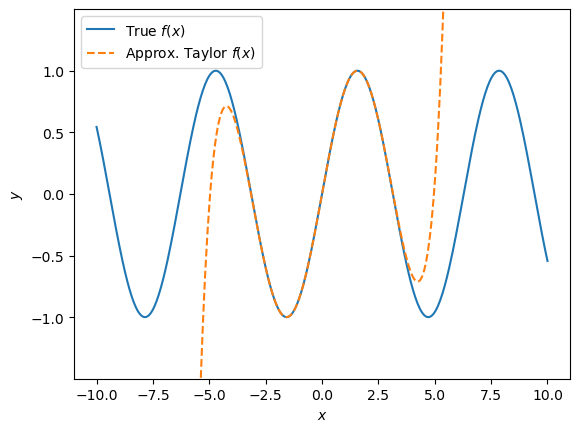

In [3]:
def taylor_series_sin(x, n_terms):
    """
    Calculate the Taylor series approximation of sin(x) up to n_terms terms.
    """
    approximation = np.zeros_like(x)
    for n in range(n_terms):
        coefficient = ((-1)**n) / np.math.factorial(2*n + 1)
        term = coefficient * (x**(2*n + 1))
        approximation += term
    return approximation

# Define the x values
x = np.linspace(-10, 10, 400)
# Calculate the true values of sin(x)
y_true = np.sin(x)

plt.plot(x, y_true, label=r'True $f(x)$')
plt.plot(x, taylor_series_sin(x, 5), label=r'Approx. Taylor $f(x)$', linestyle='--')
plt.ylim(min(y_true)-0.5, max(y_true)+0.5)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()


While this is certainly doable it requires us to solve by-hand and write a new python function for every new Taylor series we wish to use. Thankfully, there is a useful package ```Sympy``` which allows us to do symbolic operations like Mathematica. This will allow us to have a general function which will be able to give us any Taylor series! We'll use this to allow our demonstration codes to be less ambiguous and start with an example of how to use it.

In [4]:
# Import sympy
import sympy as sp

In [6]:
# Define the variable and the function
x = sp.symbols('x') # This defines a "symbol" to manipulate
function = sp.sin(x) # We can make functions containing operations with the symbols we create

# Define the point of expansion (e.g., x0 = 0)
x0 = 0

# Define the order of the Taylor series expansion (e.g., 4th order)
order = 4

# Compute the Taylor series expansion
taylor_series = sp.series(function, x, x0, order+1).removeO()

# Display the Taylor series
print(f"Taylor series expansion of {function} at x = {x0} up to order {order}:")
print('\nIn a python print format:')
print(taylor_series)
print('\nIn a nice LaTex-like display:')
display(taylor_series) # Use "display" in Jupyter to have a nicely displayed format


Taylor series expansion of sin(x) at x = 0 up to order 4:

In a python print format:
-x**3/6 + x

In a nice LaTex-like display:


-x**3/6 + x

We can also consider how we might use these ```Sympy``` functions in combination with ```Numpy```. There are some tricks to it though as we need to ensure that data types are correct. In fact, ```Sympy``` has its own float type which can cause issues with ```Numpy``` if you're not careful! One way to avoid this is to set the datatype yourself via the ```dtype``` argument.

In [3]:
# Example showing how to implement numpy and sympy
x = sp.symbols('x')
example = (x - 1)**2

# Show function form
print('Our example function is:')
display(example)

# If we wanted to calculate the above function using Sympy and then implement a numpy array version we can
# substitute in values accordingly using "subs"
example_x_array = np.linspace(-2.0, 2.0, 10)
example_function_array = np.array([example.subs(x, xv) for xv in example_x_array], dtype=float) # Set the type to float

# Let's see what data type we made
print('Example array naive data type:', type(example_function_array))

# And let's see the data type for a specific element
print('Element data type of example array:', type(example_x_array[0]))

Our example function is:


(x - 1)**2

Example array naive data type: <class 'numpy.ndarray'>
Element data type of example array: <class 'numpy.float64'>


Great! We have an example on how to make functions and also how to use them with ```numpy```! We can look into making Taylor Series with ```Sympy``` now.

## Calculating Taylor Series with ```Sympy```

To make our code nicer we can create two functions, one to compute the entire Taylor Series Expansion using ```Sympy``` and one which calculates a desired term using ```Sympy```. We also include another function which converts a ```Sympy``` function to a ```numpy``` array. As discussed in other modules, the reason we make functions in python is to not require us to write the same cumbersome code segments over and over again. These are simpler functions than others but we write these to save time and to give you more familiarity with writing python functions!

In [8]:
# Define a function to generally solve any Taylor series function from Sympy
def compute_taylor_series(func_, var_, a_, order_):
    return sp.series(func_, var_, a_, order_+1).removeO()

# Make another taylor series term calculator where we compute the derivative manually per term
def compute_taylor_series_term(func_, var_, a_, order_):
    return (func_.diff(var_, order_).subs(var_, a_) / factorial(order_)) * (var_ - a_)**order_

def sympy_to_numpy_array(func_, var_, var_array_):
    return np.array([func_.subs(var_, va) for va in var_array_], dtype=float)

Let's test our functions out now! We have defined a few mathematical functions (some commented out) along with an expansion order and point to expand around.

Taylor series expansion of cos(x) at x = 2 up to order 4:


(x - 2)**4*cos(2)/24 + (x - 2)**3*sin(2)/6 - (x - 2)**2*cos(2)/2 - (x - 2)*sin(2) + cos(2)

Taylor series expansion by manually summing Sympy terms:


(x - 2)**4*cos(2)/24 + (x - 2)**3*sin(2)/6 - (x - 2)**2*cos(2)/2 - (x - 2)*sin(2) + cos(2)

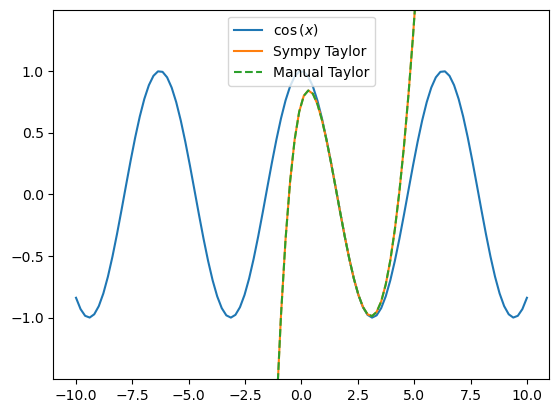

In [9]:
# Define the variable and the function
x = sp.symbols('x')
# function = 1 / (1 - x)
function = sp.cos(x)
# function = sp.sin(x)

# Define the point of expansion (e.g., x0 = 0)
x0 = 2

# Define the order of the Taylor series expansion (e.g., 4th order)
order = 4

solution = compute_taylor_series(function, x, x0, order)

# Display the Taylor series calculated entirely by Sympy
print(f"Taylor series expansion of {function} at x = {x0} up to order {order}:")
display(solution)

# Calculate Taylor series terms individually inside a loop while summing the terms together. A more "manual" approach
print(f"Taylor series expansion by manually summing Sympy terms:")
sum_term_taylor = compute_taylor_series_term(function, x, x0, 0)
for n in range(order):
    sum_term_taylor += compute_taylor_series_term(function, x, x0, n+1)
display(sum_term_taylor)

# Plot taylor expansions
x_vals = np.linspace(-10, 10, 100)
function_array = sympy_to_numpy_array(function, x, x_vals)
plt.plot(x_vals, function_array, label=r'${}$'.format(sp.latex(function)))
plt.plot(x_vals, sympy_to_numpy_array(solution, x, x_vals), label='Sympy Taylor')
plt.plot(x_vals, sympy_to_numpy_array(sum_term_taylor, x, x_vals), label='Manual Taylor', linestyle='--')
plt.ylim(min(function_array)-0.5, max(function_array)+0.5)
plt.legend()

And we see it works pretty well! Now we can calculate a few different Taylor terms for different functions. The following is the code that was used to generate the plots for the in-class activity of matching Taylor Series!

So we don't have to keep writing the same lines of code with slight modifications, we can define a function to plot any function on a given axis with some standard scaling term.

In [10]:
# Defining function for plotting series expansions
def plot_taylor_and_terms(ax_list_, func_, var_, var_array_, a_, order_list_, show_total_taylor=True, show_taylor_term_names=True):
    # We assume we will want to plot various Taylor Series Order terms on different subplots which we would mix up to make our matching game
    # With this in mind, the size of our provided subplot axes should be 1 larger than the list of term orders we want to plot. We check this here.
    if len(ax_list_) < len(order_list_) + 1:
        raise ValueError('Error: size of provided axis list is {} while Taylor order is {}. Please ensure the length of order_list_ == length of ax_list_ - 1.')
    
    # Convert given sympy function to numpy
    numpy_func_ = sympy_to_numpy_array(func_, var_, var_array_)
    
    # Plot our function on the first panel
    ax_list_[0].set_title(r'$f(x) = {}$'.format(sp.latex(func_)))
    ax_list_[0].set_ylabel(r'$f(x)$')
    ax_list_[0].set_xlabel(r'$x$')
    ax_list_[0].plot(var_array_, numpy_func_, label=r'${}$'.format(sp.latex(func_)))

    # Get maximum of plot to set y-limits
    maximum_ = max(numpy_func_) + 0.5
    
    # Calculate Taylor expansion terms and plot accordingly
    for i in range(len(order_list_)):
        # Calculate Taylor term in Sympy
        taylor_term_ = compute_taylor_series_term(func_, var_, a_, order_list_[i])

        # Convert to numpy
        numpy_taylor_term_ = sympy_to_numpy_array(taylor_term_, var_, var_array_)

        if show_taylor_term_names:
            ax_list_[i+1].set_title(r'$T({}) = {}$'.format(order_list_[i], sp.latex(taylor_term_)))
        ax_list_[i+1].set_ylabel(r'$T_n(x)$')
        ax_list_[i+1].set_xlabel(r'$x$')

        # Plot
        ax_list_[i+1].plot(var_array_, numpy_taylor_term_)
        ax_list_[i+1].set_ylim(-maximum_, maximum_)
    
    # Plot the total Taylor expansion terms
    if show_total_taylor:
        taylor_ = compute_taylor_series(func_, var_, a_, order_list_[-1])
        ax_list_[-1].plot(var_array_, numpy_func_, label=r'${}$'.format(sp.latex(func_)))
        ax_list_[-1].plot(var_array_, sympy_to_numpy_array(taylor_, var_, var_array_), label=r'$T = {}$'.format(sp.latex(taylor_)), linestyle='--')
        ax_list_[-1].set_title(r'$T = {}$'.format(sp.latex(taylor_)))
        ax_list_[-1].set_ylim(-maximum_, maximum_)

Let's see our 3 figures and their Taylor series expansion terms along with the total Taylor Series expansion. To show that last part we set ```show_total_taylor=True``` in our function defined above. We also will show the on the title of each figure the equation that makes up the Taylor term by setting the optional argument ```show_taylor_term_names=True```.

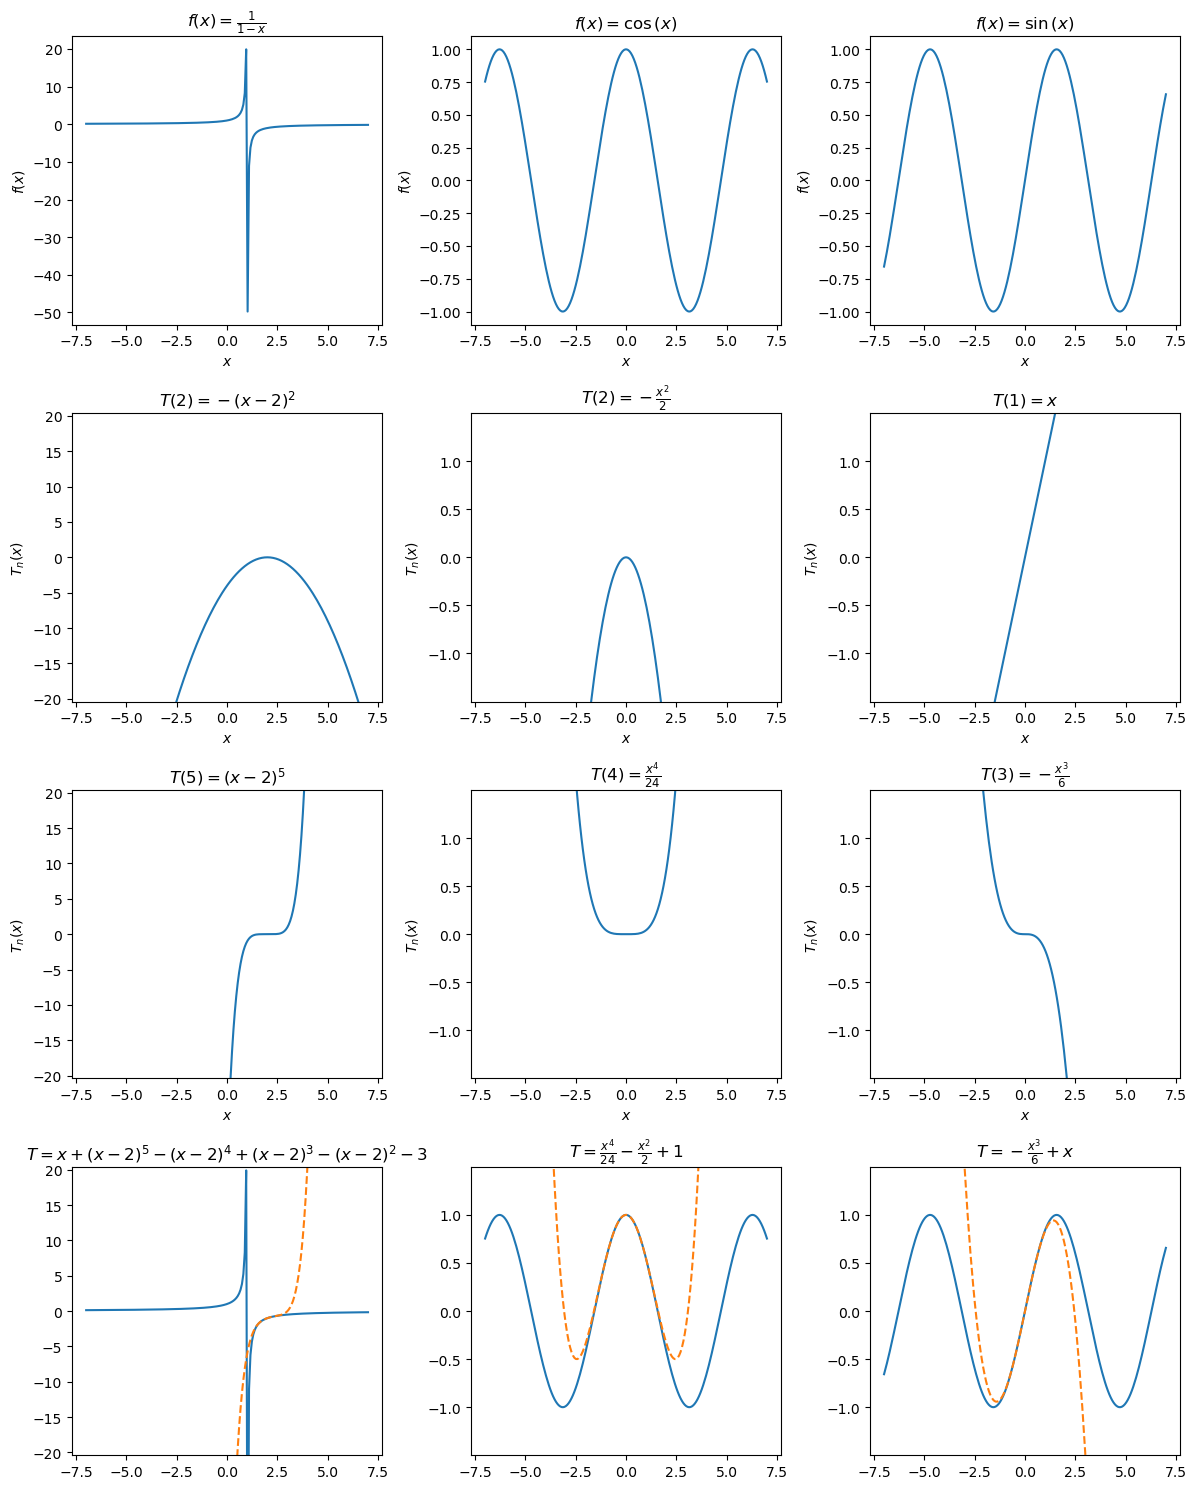

In [13]:
# Define the variable and the function
x = sp.symbols('x')
function_1 = 1 / (1 - x)
function_2 = sp.cos(x)
function_3 = sp.sin(x)

# Array for independent variable
x_vals = np.linspace(-7, 7, 200)

# Define the point of expansion (e.g., x0 = 0)
a_1 = 2
a_2 = 0
a_3 = 0

# Define the order of the Taylor series expansion (e.g., 4th order)
order_1 = [2, 5]
order_2 = [2, 4]
order_3 = [1, 3]

# Make figure for subplots
fig, ax = plt.subplots(4,3, figsize=[12, 15])

# Plot first set of figures
plot_taylor_and_terms(ax[:, 0], function_1, x, x_vals, a_1, order_1, show_total_taylor=True, show_taylor_term_names=True)

# Plot second set of figures
plot_taylor_and_terms(ax[:, 1], function_2, x, x_vals, a_2, order_2, show_total_taylor=True, show_taylor_term_names=True)

# Plot third set of figures
plot_taylor_and_terms(ax[:, 2], function_3, x, x_vals, a_3, order_3, show_total_taylor=True, show_taylor_term_names=True)

fig.tight_layout()

Great! Now to save these for the interactive course, we can include one more term ```save_fig``` to save our figure. We have commented this out for now to avoid filling up our repository with unnecessary figures so be sure to uncomment this if you'd like to use it!

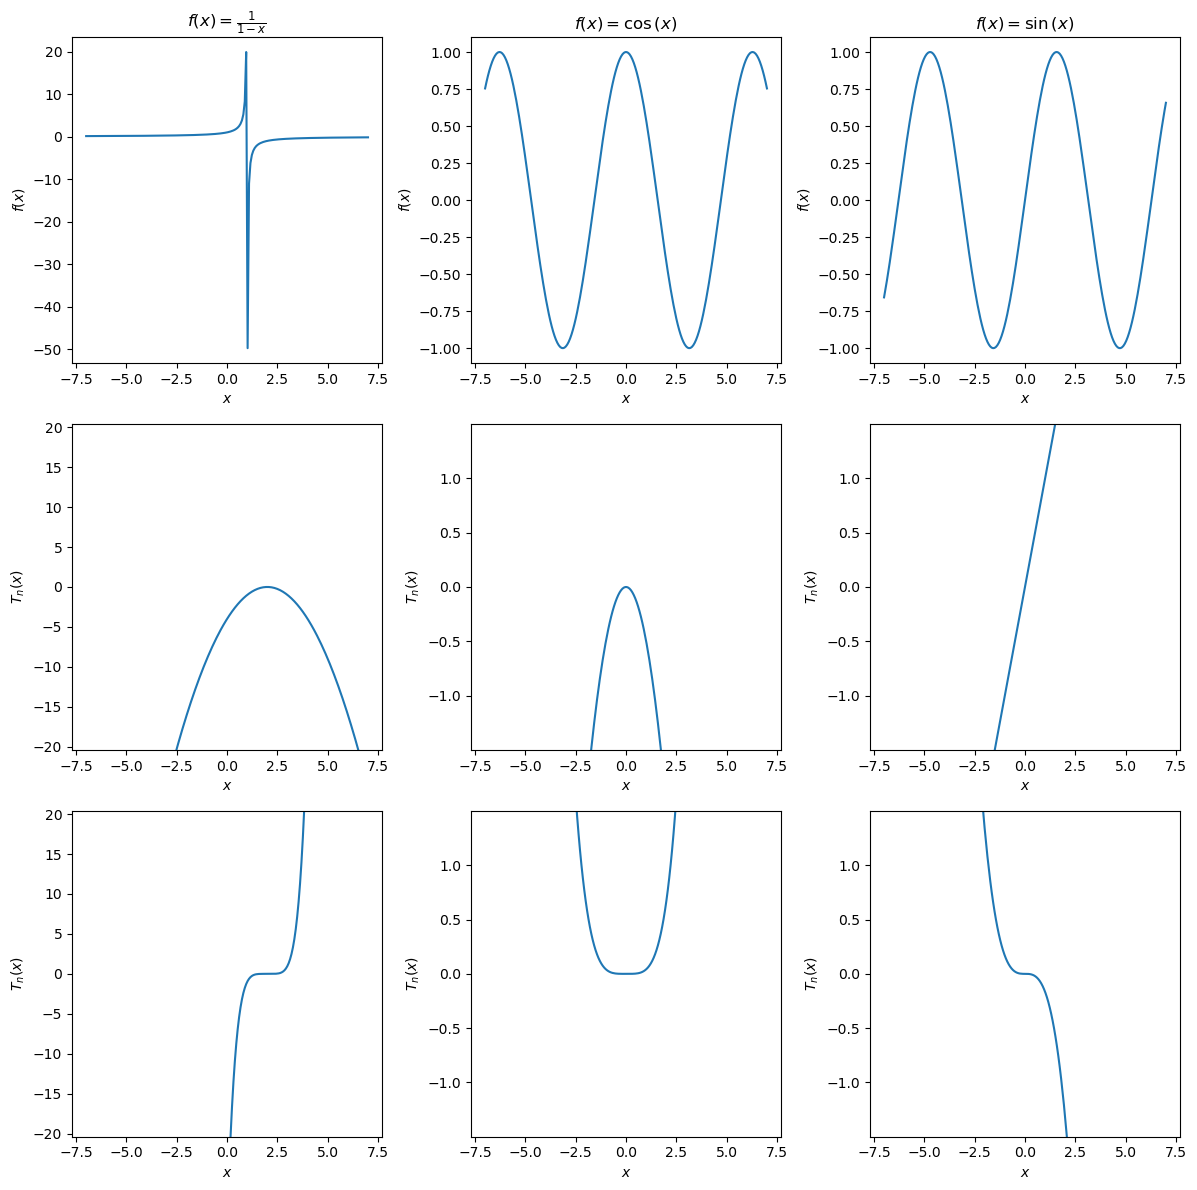

In [14]:
# Define the variable and the function
x = sp.symbols('x')
function_1 = 1 / (1 - x)
function_2 = sp.cos(x)
function_3 = sp.sin(x)

# Array for independent variable
x_vals = np.linspace(-7, 7, 200)

# Define the point of expansion (e.g., x0 = 0)
a_1 = 2
a_2 = 0
a_3 = 0

# Define the order of the Taylor series expansion (e.g., 4th order)
order_1 = [2, 5]
order_2 = [2, 4]
order_3 = [1, 3]

# Make figure for subplots
fig, ax = plt.subplots(3,3, figsize=[12, 12])

# Plot first set of figures
plot_taylor_and_terms(ax[:, 0], function_1, x, x_vals, a_1, order_1, show_total_taylor=False, show_taylor_term_names=False)

# Plot second set of figures
plot_taylor_and_terms(ax[:, 1], function_2, x, x_vals, a_2, order_2, show_total_taylor=False, show_taylor_term_names=False)

# Plot third set of figures
plot_taylor_and_terms(ax[:, 2], function_3, x, x_vals, a_3, order_3, show_total_taylor=False, show_taylor_term_names=False)

fig.tight_layout()
# plt.savefig('inclass_taylor_series.png') # Save to png
# plt.savefig('inclass_taylor_series.pdf') # Save to pdf

To illustrate how well Taylor Series approximate our desired functions, we can create a ```Plotly``` figure with a slider to allow one to change the number of terms included. If our Taylor series is well-behaved, we should get closer and closer to the true solution with more terms.

In [15]:
# Import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [18]:
# Define the x values
# For Sympy independent variable
x = sp.symbols('x')

# Define value to expand around (a)
a = 0

# For numpy independent variable array values
x_vals = np.linspace(-7, 7, 300)

# Define max order for our expansion
max_order = 18

# Define our Sympy function to calculate
function = sp.sin(x)
ylims = [-1.5, 1.5]

# Calculate the true values of our function in a numpy array
function_array = np.array([function.subs(x, xv) for xv in x_vals], dtype=float)

# Create the initial figure
fig = make_subplots(rows=1, cols=1)

# Add the true sin(x) function
fig.add_trace(go.Scatter(x=x_vals, y=function_array, mode='lines', name=str(function)))

# Add initial Taylor series approximation with n_terms = 1
y_approx = compute_taylor_series(function, x, a, 1)
y_approx_array = np.array([y_approx.subs(x, xv) for xv in x_vals], dtype=float)
taylor_trace = go.Scatter(x=x_vals, y=y_approx_array, mode='lines', name=f'Taylor Series (n=1)')
fig.add_trace(taylor_trace)

# Update function for sliders
steps = []
for n in range(1, max_order):
    y_approx = compute_taylor_series(function, x, a, n)
    y_approx_array = np.array([y_approx.subs(x, xv) for xv in x_vals], dtype=float)
    
    # Create steps
    step = dict(
        method='update',
        args=[{'y': [function_array, y_approx_array]},
              {'title': f'Taylor Series Approximation of {function} with {n} terms'}],
        label=f'{n}'
    )
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Number of terms: "},
    pad={"t": 50},
    steps=steps
)]

# Fix the x and y axes ranges
fig.update_layout(
    title='Taylor Series Approximation of sin(x)',
    xaxis=dict(title='x', range=[min(x_vals), max(x_vals)]),
    yaxis=dict(title='y', range=ylims),
    sliders=sliders
)

fig.show()


### Concept Check 1

Why does the figure above not change on even intervals?

<details>
  <summary>Click here for sample answer</summary>
  
  For our Taylor Series expansion of sine, we only get back odd functions i.e. functions where their endpoint behavior differs by a sign, left may go to $-\infty$ and right goes to $+\infty$ or vice versa! If we change our function to cosine, we'd see only even terms change our expansion.
</details>


### Concept Check 2

The formula for a Taylor series includes higher order polynomial terms scaled by coefficients based on the derivatives of the function considered. Why is it important that the derivatives are included into the expansion?

<details>
  <summary>Click here for sample answer</summary>
  
  We recall from the previous lectures on derivatives that they can provide us with important insight into the instantaneous behavior of a system. If we only know how our system behaves at a point or a set of local points, we would like to extract as much information from it as possible. By computing the derivatives for the higher order terms, we are providing our series with more information about the true function's curvature and behavior! Since we are using polynomials which will only reproduce the local behavior, matching these to the proper curvature is imperative.
</details>

Let's look in more detail at a case where we don't necessarily get uniform convergence across the entire space.

In [23]:
# Define the x values
# For Sympy independent variable
x = sp.symbols('x')

# Define value to expand around (a)
a = 0

# For numpy independent variable array values
x_vals = np.linspace(-7, 7, 300)

# Define max order for our expansion
max_order = 18

# Define our Sympy function to calculate
function = 1 / (1-x)
ylims = [-10, 10]

# Calculate the true values of our function in a numpy array
function_array = np.array([function.subs(x, xv) for xv in x_vals], dtype=float)

# Create the initial figure
fig = make_subplots(rows=1, cols=1)

# Add the true sin(x) function
fig.add_trace(go.Scatter(x=x_vals, y=function_array, mode='lines', name=str(function)))

# Add initial Taylor series approximation with n_terms = 1
y_approx = compute_taylor_series(function, x, a, 1)
y_approx_array = np.array([y_approx.subs(x, xv) for xv in x_vals], dtype=float)
taylor_trace = go.Scatter(x=x_vals, y=y_approx_array, mode='lines', name=f'Taylor Series (n=1)')
fig.add_trace(taylor_trace)

# Update function for sliders
steps = []
for n in range(1, max_order):
    y_approx = compute_taylor_series(function, x, a, n)
    y_approx_array = np.array([y_approx.subs(x, xv) for xv in x_vals], dtype=float)
    
    # Create steps
    step = dict(
        method='update',
        args=[{'y': [function_array, y_approx_array]},
              {'title': r'Taylor Series Approximation of {} with {} terms'.format(function, n)}],
        label=f'{n}'
    )
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Number of terms: "},
    pad={"t": 50},
    steps=steps
)]

# Fix the x and y axes ranges
fig.update_layout(
    title=r'Taylor Series Approximation of {}'.format(function),
    xaxis=dict(title='x', range=[min(x_vals), max(x_vals)]),
    yaxis=dict(title='y', range=ylims),
    sliders=sliders
)

fig.show()


### Concept Check 3

In our figure, we see that when we set our expansion point to be around $x=0$ we get a good reproduction around this point and to the right until the discontinuity at $x=1$. Why do we get better convergence on this right side while the left side diverges faster?

<details>
  <summary>Click here for sample answer</summary>
  
  As we've discussed above, the point we are going to best reproduce will be the expansion point $x=a=0$. Since we are encoding information about the curvature of our function via the derivatives, we might expect our series to be dominated by any large derivative terms which don't cancel the increasing behavior of our polynomial expansion $\frac{1}{1-x} = 1 + x + x^2 + x^3 + ... = \sum_n=0^\infty x^n$. By this we mean that if we don't have any coefficients coming from the derivative that can "cancel" the increasing effects of $x^n$ we will have a solution which diverges!

  Indeed, this is a problem that is well known and classified by something called the Radius of Convergence. We see that by setting $x=\pm1$ we have two endpoint cases:

  1. $x\rightarrow1^-$: When approaching from the left we rapidly go to $\infty$ which must be matched by our polynomial - hence its tendency to blow up.

  2. $x\rightarrow -1$: when approaching $-1$ we see our polynomial terms will oscillate $f(-1) = 1 + (-1) + (-1)^2 + (-1)^3 + ... = 1 - 1 + 1 - 1 + ... = \sum_n=0^\infty (-1)^n$ at its endpoint. We have no control over this in our expansion so we are left with an increasingly divergent solution!

  Here we see that we can only get converging solutions between $x=\pm 1$ so our radius of convergence will be $R=1$.
</details>